# NLP第二次作业，北京地铁路线

第一：获得每一条地铁线的站名，经纬度（根据经纬度可计算距离）

第二：画图，修改换乘策略，进行测试

In [52]:
class GetInfo:
    def __init__(self,df):
        import pandas
        #assert type(df) == pandas.core.frame.DataFrame and ('city' in df.columns) and ('name' in df.columns),\
# 'The dataframe is not vailid'
        from bs4 import BeautifulSoup 
        from urllib import request
        import re
        import pandas as pd
        import numpy as np
        import urllib.parse as urp
        from xml.etree import ElementTree
        import time
        self.__data__ = df
    
    def get_location(self):
        self.__data__['lng'] = np.nan
        self.__data__['lat'] = np.nan
        for i in self.__data__.index:
            self.__data__.loc[i,'lat'],self.__data__.loc[i,'lng'] = self.__get_location1__(self.__data__.loc[i,'name'],\
                                                                                           self.__data__.loc[i,'city'])
        return self.__data__
    
    def __get_location1__(self,name,city):
#         my_ak = ###换上自己的AK##
        my_ak = '389880a06e3f893ea46036f030c94700'
        tag = urp.quote('地铁站')
        qurey = urp.quote(name)
        try:
            url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
            req = request.urlopen(url)
            res = req.read().decode()
            lat = pd.to_numeric(re.findall('"lat":(.*)',res)[0].split(',')[0])
            lng = pd.to_numeric(re.findall('"lng":(.*)',res)[0])
            return lat,lng
        except:
            return 0,0


In [53]:
import pandas as pd
import numpy as np

In [54]:
#x.__get_location1__('大钟寺','北京')

In [55]:
df2 = pd.DataFrame([[1,2],[3,4]],index=list('AB'),columns=list('ab'))

In [56]:
df2

,a,b
A,1,2
B,3,4


In [57]:
df = pd.DataFrame([],index=['北京'],columns=['大钟寺'])

In [58]:
df

,大钟寺
北京,NaN


In [59]:
x = GetInfo(df)  #生成一个对象

In [60]:
import pandas
from bs4 import BeautifulSoup 
from urllib import request
import re
import pandas as pd
import numpy as np
import urllib.parse as urp
from xml.etree import ElementTree
import time

In [61]:
def __get_location1__(name,city='北京'):
        my_ak = 'urX1gsNQ4qXjqZGtGukU4llFom1XGbiO'
        tag = urp.quote('地铁站')
        qurey = urp.quote(name)
        try:
            url = 'http://api.map.baidu.com/place/v2/search?query='+qurey+'&tag='+'&region='+urp.quote(city)+'&output=json&ak='+my_ak
            print(url)
            req = request.urlopen(url)
            res = req.read().decode()
            lat = pd.to_numeric(re.findall('"lat":(.*)',res)[0].split(',')[0])
            lng = pd.to_numeric(re.findall('"lng":(.*)',res)[0])
            return (lng,lat)  #经度和纬度
        except:
            return 0,0

In [62]:
__get_location1__('东直门')

http://api.map.baidu.com/place/v2/search?query=%E4%B8%9C%E7%9B%B4%E9%97%A8&tag=&region=%E5%8C%97%E4%BA%AC&output=json&ak=urX1gsNQ4qXjqZGtGukU4llFom1XGbiO


(116.44145400000001, 39.947891999999996)

In [63]:
from collections import defaultdict

In [64]:
simple_connection_info = defaultdict(list)  #dict

In [65]:
simple_connection_info

defaultdict(list, {})

In [66]:
simple_connection_info_src = {'海淀黄庄': ['苏州街', '知春里', '中关村', '人民大学'],
 '知春里': ['海淀黄庄', '知春路'],
 '知春路': ['知春里', '西土城', '大钟寺', '五道口'],
 '西土城': ['知春路', '牡丹园'],
 '牡丹园': ['西土城', '健德门'],
 '健德门': ['牡丹园', '北土城'],
 '北土城': ['健德门', '安贞门', '奥体中心', '安华桥'],
 '安贞门': ['北土城', '惠新西街南口'],
 '惠新西街南口': ['安贞门', '芍药居', '和平西桥', '惠新西街北口'],
 '芍药居': ['惠新西街南口', '太阳宫', '望京西', '光熙门'],
 '太阳宫': ['芍药居', '三元桥'],
 '三元桥': ['太阳宫', '亮马桥', '东直门', '3号航站楼'],
 '亮马桥': ['三元桥', '农业展览馆'],
 '农业展览馆': ['亮马桥', '团结湖'],
 '团结湖': ['农业展览馆', '呼家楼'],
 '呼家楼': ['团结湖', '金台夕照', '东大桥', '金台路'],
 '金台夕照': ['呼家楼', '国贸'],
 '国贸': ['金台夕照', '双井', '永安里', '大望路'],
 '双井': ['国贸', '劲松', '广渠门外', '九龙山'],
 '劲松': ['双井', '潘家园'],
 '潘家园': ['劲松', '十里河'],
 '十里河': ['潘家园', '分钟寺', '蒲黄榆', '九龙山'],
 '分钟寺': ['十里河', '成寿寺'],
 '成寿寺': ['分钟寺', '宋家庄'],
 '宋家庄': ['成寿寺', '石榴庄', '肖村', '刘家窑'],
 '石榴庄': ['宋家庄', '大红门'],
 '大红门': ['石榴庄', '角门东', '海户屯', '大红门南'],
 '角门东': ['大红门', '角门西'],
 '角门西': ['角门东', '草桥', '马家堡', '公益西桥'],
 '草桥': ['角门西', '纪家庙'],
 '纪家庙': ['草桥', '首经贸'],
 '首经贸': ['纪家庙', '丰台站'],
 '丰台站': ['首经贸', '泥洼'],
 '泥洼': ['丰台站', '西局'],
 '西局': ['七里庄'],
 '六里桥': ['西局', '莲花桥', '七里庄', '六里桥东'],
 '莲花桥': ['六里桥', '公主坟'],
 '公主坟': ['莲花桥', '西钓鱼台', '万寿路', '军事博物馆'],
 '西钓鱼台': ['公主坟', '慈寿寺'],
 '慈寿寺': ['西钓鱼台', '车道沟', '海淀五路居', '花园桥'],
 '车道沟': ['慈寿寺', '长春桥'],
 '长春桥': ['车道沟', '火器营'],
 '火器营': ['长春桥'],
 '西直门': ['大钟寺', '积水潭', '动物园', '新街口'],
 '大钟寺': ['西直门', '知春路'],
 '五道口': ['知春路', '上地'],
 '上地': ['五道口', '西二旗'],
 '西二旗': ['上地', '龙泽', '生命科学园'],
 '龙泽': ['西二旗', '回龙观'],
 '回龙观': ['龙泽', '霍营'],
 '霍营': ['回龙观', '立水桥', '回龙观东大街', '育新'],
 '立水桥': ['霍营', '北苑', '立水桥南', '天通苑南'],
 '北苑': ['立水桥', '望京西'],
 '望京西': ['北苑', '芍药居', '望京', '关庄'],
 '光熙门': ['芍药居', '柳芳'],
 '柳芳': ['光熙门', '东直门'],
 '东直门': ['柳芳', '三元桥', '雍和宫', '东四十条'],
 '张郭庄': ['园博园'],
 '园博园': ['张郭庄', '大瓦窑'],
 '大瓦窑': ['园博园', '郭庄子'],
 '郭庄子': ['大瓦窑', '大井'],
 '大井': ['郭庄子', '七里庄'],
 '七里庄': ['大井', '西局', '丰台东大街', '六里桥'],
 '善各庄': ['来广营'],
 '陶然桥': ['北京南站', '永定门外'],
 '永定门外': ['陶然桥', '景泰', '天桥', '木樨园'],
 '景泰': ['永定门外', '方庄'],
 '方庄': ['景泰', '北工大西门'],
 '北工大西门': ['方庄', '平乐园'],
 '平乐园': ['北工大西门', '北京南站'],
 '北京南站': ['平乐园', '蒲黄榆', '陶然亭', '马家堡'],
 '蒲黄榆': ['北京南站', '十里河', '刘家窑', '天坛东门'],
 '九龙山': ['十里河', '大望路', '双井', '大郊亭'],
 '大望路': ['九龙山', '朝阳公园', '国贸', '四惠'],
 '朝阳公园': ['大望路', '枣营'],
 '枣营': ['朝阳公园', '东风北桥'],
 '东风北桥': ['枣营', '高家园'],
 '高家园': ['东风北桥', '阜通'],
 '阜通': ['高家园', '望京'],
 '望京': ['阜通', '金台路', '望京东', '望京西'],
 '金台路': ['望京', '将台', '呼家楼', '十里堡'],
 '将台': ['金台路', '望京南'],
 '望京南': ['将台', '东湖渠'],
 '东湖渠': ['望京南', '来广营'],
 '来广营': ['东湖渠','善各庄'],
 '俸伯': ['顺义'],
 '顺义': ['俸伯', '石门'],
 '石门': ['顺义', '南法信'],
 '南法信': ['石门', '后沙峪'],
 '后沙峪': ['南法信', '花梨坎'],
 '花梨坎': ['后沙峪', '国展'],
 '国展': ['花梨坎', '孙河'],
 '孙河': ['国展', '马泉营'],
 '马泉营': ['孙河', '崔各庄'],
 '崔各庄': ['马泉营', '望京东'],
 '望京东': ['崔各庄', '望京'],
 '关庄': ['望京西', '大屯路东'],
 '大屯路东': ['关庄', '安立路', '惠新西街北口', '北苑路北'],
 '安立路': ['大屯路东', '奥林匹克公园'],
 '奥林匹克公园': ['安立路', '北沙滩', '森林公园南门', '奥体中心'],
 '北沙滩': ['奥林匹克公园', '六道口'],
 '六道口': ['北沙滩', '清华东路西口'],
 '清华东路西口': ['六道口'],
 '西苑': ['农大南路', '北宫门', '圆明园'],
 '农大南路': ['西苑', '马连洼'],
 '马连洼': ['农大南路', '西北旺'],
 '西北旺': ['马连洼', '永丰南'],
 '永丰南': ['西北旺', '永丰'],
 '永丰': ['永丰南', '屯佃'],
 '屯佃': ['永丰', '稻香湖路'],
 '稻香湖路': ['屯佃', '温阳路'],
 '温阳路': ['稻香湖路', '北安河'],
 '北安河': ['温阳路'],
 '四惠': ['四惠东', '大望路', '四惠东'],
 '四惠东': ['四惠', '高碑店', '四惠'],
 '高碑店': ['四惠东', '传媒大学'],
 '传媒大学': ['高碑店', '双桥'],
 '双桥': ['传媒大学', '管庄'],
 '管庄': ['双桥', '八里桥'],
 '八里桥': ['管庄', '通州北苑'],
 '通州北苑': ['八里桥', '果园'],
 '果园': ['通州北苑', '九棵树'],
 '九棵树': ['果园', '梨园'],
 '梨园': ['九棵树', '临河里'],
 '临河里': ['梨园', '土桥'],
 '土桥': ['临河里'],
 '昌平西山口': ['十三陵景区'],
 '十三陵景区': ['昌平西山口', '昌平'],
 '昌平': ['十三陵景区', '昌平东关'],
 '昌平东关': ['昌平', '北邵洼'],
 '北邵洼': ['昌平东关', '南邵'],
 '南邵': ['北邵洼', '沙河高教园'],
 '沙河高教园': ['南邵', '沙河'],
 '沙河': ['沙河高教园', '巩华城'],
 '巩华城': ['沙河', '朱辛庄'],
 '朱辛庄': ['巩华城', '生命科学园', '育知路'],
 '生命科学园': ['朱辛庄', '西二旗'],
 '肖村': ['宋家庄', '小红门'],
 '小红门': ['肖村', '旧宫'],
 '旧宫': ['小红门', '亦庄桥'],
 '亦庄桥': ['旧宫', '亦庄文化园'],
 '亦庄文化园': ['亦庄桥', '万源街'],
 '万源街': ['亦庄文化园', '荣京东街'],
 '荣京东街': ['万源街', '荣昌东街'],
 '荣昌东街': ['荣京东街', '同济南路'],
 '同济南路': ['荣昌东街', '经海路'],
 '经海路': ['同济南路', '次渠南'],
 '次渠南': ['经海路', '次渠'],
 '次渠': ['次渠南', '亦庄火车站'],
 '亦庄火车站': ['次渠'],
 '郭公庄': ['大葆台', '丰台科技园'],
 '大葆台': ['郭公庄', '稻田'],
 '稻田': ['大葆台', '长阳'],
 '长阳': ['稻田', '篱笆房'],
 '篱笆房': ['长阳', '广阳城'],
 '广阳城': ['篱笆房', '良乡大学城北'],
 '良乡大学城北': ['广阳城', '良乡大学城'],
 '良乡大学城': ['良乡大学城北', '良乡大学城西'],
 '良乡大学城西': ['良乡大学城', '良乡南关'],
 '良乡南关': ['良乡大学城西', '苏庄'],
 '苏庄': ['良乡南关'],
 '3号航站楼': ['三元桥', '2号航站楼'],
 '2号航站楼': ['3号航站楼'],
 '公益西桥': ['新宫', '角门西'],
 '新宫': ['公益西桥', '西红门'],
 '西红门': ['新宫', '高米店北'],
 '高米店北': ['西红门', '高米店南'],
 '高米店南': ['高米店北', '枣园'],
 '枣园': ['高米店南', '清源路'],
 '清源路': ['枣园', '黄村西大街'],
 '黄村西大街': ['清源路', '黄村火车站'],
 '黄村火车站': ['黄村西大街', '义和庄'],
 '义和庄': ['黄村火车站', '生物医药基地'],
 '生物医药基地': ['义和庄', '天宫院'],
 '天宫院': ['生物医药基地'],
 '石厂': ['小园'],
 '小园': ['石厂', '栗园庄'],
 '栗园庄': ['小园', '上岸'],
 '上岸': ['栗园庄', '桥户营'],
 '桥户营': ['上岸', '四道桥'],
 '四道桥': ['桥户营', '金安桥'],
 '苹果园': ['古城', '金安桥', '杨庄'],
 '古城': ['苹果园', '八角游乐园'],
 '八角游乐园': ['古城', '八宝山'],
 '八宝山': ['八角游乐园', '玉泉路'],
 '玉泉路': ['八宝山', '五棵松'],
 '五棵松': ['玉泉路', '万寿路'],
 '万寿路': ['五棵松', '公主坟'],
 '军事博物馆': ['公主坟', '木樨地', '北京西站', '白堆子'],
 '木樨地': ['军事博物馆', '南礼士路'],
 '南礼士路': ['木樨地', '复兴门'],
 '复兴门': ['南礼士路', '西单', '长椿街', '阜成门'],
 '西单': ['复兴门', '天安门西', '灵境胡同', '宣武门'],
 '天安门西': ['西单', '天安门东'],
 '天安门东': ['天安门西', '王府井'],
 '王府井': ['天安门东', '东单'],
 '东单': ['王府井', '建国门', '崇文门', '灯市口'],
 '建国门': ['东单', '永安里', '朝阳门', '北京站'],
 '永安里': ['建国门', '国贸'],
 '积水潭': ['西直门', '鼓楼大街'],
 '鼓楼大街': ['积水潭', '安定门', '安德里北街', '什刹海'],
 '安定门': ['鼓楼大街', '雍和宫'],
 '雍和宫': ['安定门', '东直门', '北新桥', '和平里北街'],
 '东四十条': ['东直门', '朝阳门'],
 '朝阳门': ['东四十条', '建国门', '东四', '东大桥'],
 '北京站': ['建国门', '崇文门'],
 '崇文门': ['北京站', '前门', '磁器口', '东单'],
 '前门': ['崇文门', '和平门'],
 '和平门': ['前门', '宣武门'],
 '宣武门': ['和平门', '长椿街', '西单', '菜市口'],
 '长椿街': ['宣武门', '复兴门'],
 '阜成门': ['复兴门', '车公庄'],
 '车公庄': ['阜成门', '车公庄西', '平安里'],
 '安河桥北': ['北宫门'],
 '北宫门': ['安河桥北', '西苑'],
 '圆明园': ['西苑', '北京大学东门'],
 '北京大学东门': ['圆明园', '中关村'],
 '中关村': ['北京大学东门', '海淀黄庄'],
 '人民大学': ['海淀黄庄', '魏公村'],
 '魏公村': ['人民大学', '国家图书馆'],
 '国家图书馆': ['魏公村', '动物园', '白石桥南'],
 '动物园': ['国家图书馆', '西直门'],
 '新街口': ['西直门', '平安里'],
 '平安里': ['新街口', '西四', '车公庄', '北海北'],
 '西四': ['平安里', '灵境胡同'],
 '灵境胡同': ['西四', '西单'],
 '菜市口': ['宣武门', '陶然亭', '广安门内', '虎坊桥'],
 '陶然亭': ['菜市口', '北京南站'],
 '马家堡': ['北京南站', '角门西'],
 '刘家窑': ['宋家庄', '蒲黄榆'],
 '天坛东门': ['蒲黄榆', '磁器口'],
 '磁器口': ['天坛东门', '崇文门', '桥湾', '广渠门内'],
 '灯市口': ['东单', '东四'],
 '东四': ['灯市口', '张自忠路', '南锣鼓巷', '朝阳门'],
 '张自忠路': ['东四', '北新桥'],
 '北新桥': ['张自忠路', '雍和宫'],
 '和平里北街': ['雍和宫', '和平西桥'],
 '和平西桥': ['和平里北街', '惠新西街南口'],
 '惠新西街北口': ['惠新西街南口', '大屯路东'],
 '北苑路北': ['大屯路东', '立水桥南'],
 '立水桥南': ['北苑路北', '立水桥'],
 '天通苑南': ['立水桥', '天通苑'],
 '天通苑': ['天通苑南', '天通苑北'],
 '天通苑北': ['天通苑'],
 '金安桥': ['苹果园'],
 '杨庄': ['苹果园', '西黄村'],
 '西黄村': ['杨庄', '廖公庄'],
 '廖公庄': ['西黄村', '田村'],
 '田村': ['廖公庄', '海淀五路居'],
 '海淀五路居': ['田村', '慈寿寺'],
 '花园桥': ['慈寿寺', '白石桥南'],
 '白石桥南': ['花园桥', '车公庄西', '白堆子', '国家图书馆'],
 '车公庄西': ['白石桥南', '车公庄'],
 '北海北': ['平安里', '南锣鼓巷'],
 '南锣鼓巷': ['北海北', '东四', '什刹海', '中国美术馆'],
 '东大桥': ['朝阳门', '呼家楼'],
 '十里堡': ['金台路', '青年路'],
 '青年路': ['十里堡', '褡裢坡'],
 '褡裢坡': ['青年路', '黄渠'],
 '黄渠': ['褡裢坡', '常营'],
 '常营': ['黄渠', '草房'],
 '草房': ['常营', '物资学院路'],
 '物资学院路': ['草房', '通州北关'],
 '通州北关': ['物资学院路', '通运门'],
 '通运门': ['通州北关', '北运河西'],
 '北运河西': ['通运门', '北运河东'],
 '北运河东': ['北运河西', '郝家府'],
 '郝家府': ['北运河东', '东夏园'],
 '东夏园': ['郝家府', '潞城'],
 '潞城': ['东夏园'],
 '北京西站': ['湾子', '六里桥东', '军事博物馆'],
 '湾子': ['北京西站', '达官营'],
 '达官营': ['湾子', '广安门内'],
 '广安门内': ['达官营', '菜市口'],
 '虎坊桥': ['菜市口', '珠市口'],
 '珠市口': ['虎坊桥', '桥湾', '中国美术馆', '天桥'],
 '桥湾': ['珠市口', '磁器口'],
 '广渠门内': ['磁器口', '广渠门外'],
 '广渠门外': ['广渠门内', '双井'],
 '大郊亭': ['九龙山', '百子湾'],
 '百子湾': ['大郊亭', '化工'],
 '化工': ['百子湾', '南楼梓庄'],
 '南楼梓庄': ['化工', '欢乐谷景区'],
 '欢乐谷景区': ['南楼梓庄', '垡头'],
 '垡头': ['欢乐谷景区', '双合'],
 '双合': ['垡头', '焦化厂'],
 '焦化厂': ['双合'],
 '育知路': ['朱辛庄', '平西府'],
 '平西府': ['育知路', '回龙观东大街'],
 '回龙观东大街': ['平西府', '霍营'],
 '育新': ['霍营', '西小口'],
 '西小口': ['育新', '永泰庄'],
 '永泰庄': ['西小口', '林萃桥'],
 '林萃桥': ['永泰庄', '森林公园南门'],
 '森林公园南门': ['林萃桥', '奥林匹克公园'],
 '奥体中心': ['奥林匹克公园', '北土城'],
 '安华桥': ['北土城', '安德里北街'],
 '安德里北街': ['安华桥', '鼓楼大街'],
 '什刹海': ['鼓楼大街', '南锣鼓巷'],
 '中国美术馆': ['南锣鼓巷', '珠市口'],
 '天桥': ['珠市口', '永定门外'],
 '木樨园': ['永定门外', '海户屯'],
 '海户屯': ['木樨园', '大红门'],
 '大红门南': ['大红门', '和义'],
 '和义': ['大红门南', '东高地'],
 '东高地': ['和义', '火箭万源'],
 '火箭万源': ['东高地', '五福堂'],
 '五福堂': ['火箭万源', '德茂'],
 '德茂': ['五福堂', '瀛海'],
 '瀛海': ['德茂'],
 '丰台科技园': ['郭公庄', '科怡路'],
 '科怡路': ['丰台科技园', '丰台南路'],
 '丰台南路': ['科怡路', '丰台东大街'],
 '丰台东大街': ['丰台南路', '七里庄'],
 '六里桥东': ['六里桥', '北京西站'],
 '白堆子': ['军事博物馆', '白石桥南'],
 '巴沟': ['苏州街'],
 '苏州街': ['巴沟', '海淀黄庄']}



In [67]:
simple_connection_info.update(simple_connection_info_src)  #将dict转化为defaultdict

In [68]:
allStation = set()  #存储所有的站

In [69]:
for k,v in simple_connection_info.items():
    allStation.add(k)
    for sta in v:
        allStation.add(sta)

In [70]:
len(allStation)

318

In [71]:
location = {  # 上一次运行保存的结果
'苹果园': (116.184436, 39.932435999999996),
'古城': (116.19707199999999, 39.913414),
'八角游乐园': (116.21938999999999, 39.913076000000004),
'八宝山': (116.242277, 39.913185),
'玉泉路': (116.25947, 39.913501000000004),
'五棵松': (116.280423, 39.913833000000004),
'万寿路': (116.30155, 39.913709999999995),
'公主坟': (116.316696, 39.913509000000005),
'军事博物馆': (116.330207, 39.914976),
'木樨地': (116.34409699999999, 39.913125),
'南礼士路': (116.35922099999999, 39.912979),
'复兴门': (116.36376200000001, 39.913025),
'西单': (116.382001, 39.913329),
'天安门西': (116.39805, 39.913776),
'天安门东': (116.40785100000001, 39.91408),
'王府井': (116.418038, 39.91979),
'东单': (116.425248, 39.914503),
'建国门': (116.441577, 39.914505),
'永安里': (116.457089, 39.914223),
'国贸': (116.467523, 39.914435),
'大望路': (116.48342, 39.914424),
'四惠': (116.50194499999999, 39.91486),
'四惠东': (116.522347, 39.914943),
'西直门': (116.361442, 39.946436),
'积水潭': (116.379185, 39.954765),
'鼓楼大街': (116.40011000000001, 39.954724),
'安定门': (116.414597, 39.955441),
'雍和宫': (116.42363300000001, 39.953628),
'东直门': (116.44145400000001, 39.947891999999996),
'东四十条': (116.44063799999999, 39.939840999999994),
'朝阳门': (116.44063500000001, 39.930549),
'北京站': (116.43354699999999, 39.909462),
'崇文门': (116.42443899999999, 39.906953),
'前门': (116.404276, 39.906534),
'和平门': (116.390619, 39.906362),
'宣武门': (116.380848, 39.905881),
'长椿街': (116.36991100000002, 39.90534),
'阜成门': (116.36281699999999, 39.929522),
'车公庄': (116.361834, 39.938351000000004),
'宋家庄': (116.434913, 39.851941),
'刘家窑': (116.42856499999999, 39.863696999999995),
'蒲黄榆': (116.428894, 39.871689),
'天坛东门': (116.427392, 39.888496999999994),
'磁器口': (116.42603500000001, 39.899339000000005),
'灯市口': (116.42416899999999, 39.923603),
'东四': (116.423405, 39.930647),
'张自忠路': (116.423579, 39.939914),
'北新桥': (116.423298, 39.947112),
'和平里北街': (116.425051, 39.964752000000004),
'和平西桥': (116.42446299999999, 39.974502),
'惠新西街南口': (116.42403999999999, 39.983276000000004),
'惠新西街北口': (116.42353200000001, 39.994151),
'大屯路东': (116.424567, 40.009611),
'北苑路北': (116.424525, 40.036821),
'立水桥南': (116.420973, 40.048142999999996),
'立水桥': (116.418274, 40.059244),
'天通苑南': (116.419113, 40.072752),
'天通苑': (116.419233, 40.081478000000004),
'天通苑北': (116.419385, 40.089597),
'金安桥': (116.16903400000001, 39.929961999999996),
'杨庄': (116.19533600000001, 39.930221),
'西黄村': (116.208514, 39.939816),
'廖公庄': (116.23353700000001, 39.938025),
'田村': (116.252191, 39.9372),
'海淀五路居': (116.28273600000001, 39.9386),
'慈寿寺': (116.30067700000001, 39.93927),
'花园桥': (116.317559, 39.938382),
'白石桥南': (116.33203799999998, 39.938399),
'车公庄西': (116.35064399999999, 39.938074),
'平安里': (116.378635, 39.939264),
'北海北': (116.39289, 39.939493),
'南锣鼓巷': (116.409399, 39.940443),
'东大桥': (116.458252, 39.928625),
'呼家楼': (116.46823700000002, 39.928981),
'金台路': (116.48489199999999, 39.929069),
'十里堡': (116.616323, 39.929981),
'青年路': (116.523829, 39.929469),
'褡裢坡': (116.570223, 39.929826),
'黄渠': (116.58491699999999, 39.929937),
'常营': (116.605447, 39.931509999999996),
'草房': (116.622546, 39.930673),
'物资学院路': (116.64554299999999, 39.933087),
'通州北关': (116.668053, 39.924687),
'北运河西': (116.69512399999999, 39.908773),
'北运河东': (116.71374099999998, 39.909261),
'郝家府': (116.72521499999999, 39.907672),
'东夏园': (116.74089599999999, 39.909493),
'潞城': (116.754799, 39.90889),
'北京西站': (116.328103, 39.900835),
'湾子': (116.3344, 39.895902),
'达官营': (116.342069, 39.895671),
'广安门内': (116.364626, 39.89543),
'菜市口': (116.38073999999999, 39.895375),
'虎坊桥': (116.390654, 39.895691),
'珠市口': (116.40503700000001, 39.897186),
'桥湾': (116.414901, 39.899001),
'广渠门内': (116.44094299999999, 39.899615999999995),
'广渠门外': (116.45591100000001, 39.899309),
'九龙山': (116.478695,39.893222),
'大郊亭': (116.49471100000001, 39.899072),
'百子湾': (116.490883,39.894566),
'化工': (116.510091,39.893222),
'南楼梓庄': (116.50780800000001, 39.88078),
'欢乐谷景区': (116.494794,39.867738),
'垡头': (116.514452,39.864292),
'双合': (116.526836,39.859691),
'焦化厂':(116.537247,39.855488),
'朱辛庄': (116.32013, 40.110334),
'育知路': (116.333898, 40.093709999999994),
'平西府': (116.357247, 40.095791999999996),
'回龙观东大街': (116.369753, 40.086965),
'霍营': (116.366721, 40.077129),
'育新': (116.35399699999999, 40.066124),
'西小口': (116.35821299999999, 40.052716),
'永泰庄': (116.36115900000001, 40.043692),
'林萃桥': (116.378905, 40.027995000000004),
'森林公园南门': (116.39903600000001, 40.016211),
'奥林匹克公园': (116.398711, 40.007852),
'奥体中心': (116.40613799999998, 39.990549),
'北土城': (116.400663, 39.983253999999995),
'安华桥': (116.400603, 39.974878000000004),
'安德里北街': (116.400884, 39.963931),
'什刹海': (116.402547, 39.944154),
'中国美术馆': (116.415449, 39.931473),
'天桥': (116.40428, 39.888692999999996),
'永定门外': (116.405983, 39.872792),
'木樨园': (116.40633400000002, 39.865682),
'海户屯': (116.400301,39.851805),
'大红门': (116.406253, 39.851841),
'大红门南': (116.407454, 39.842626),
'和义': (116.409094, 39.825052),
'东高地': (116.41568600000001, 39.811433),
'火箭万源': (116.425129, 39.805336),
'五福堂': (116.42553400000001, 39.788612),
'德茂': (116.44825800000001, 39.778312),
'瀛海': (116.455615, 39.766756),
'郭公庄': (116.308567, 39.820764000000004),
'丰台科技园': (116.30363899999999, 39.831449),
'科怡路': (116.303808, 39.838664),
'丰台南路': (116.30285400000001, 39.847201),
'丰台东大街': (116.300215, 39.86144),
'七里庄': (116.29638, 39.870409),
'六里桥': (116.30961, 39.886428),
'六里桥东': (116.321463, 39.89278),
'白堆子': (116.33235900000001, 39.929707),
'国家图书馆': (116.331897, 39.948864),
'巴沟': (116.298179, 39.980678000000005),
'苏州街': (116.31276799999999, 39.981704),
'海淀黄庄': (116.324348, 39.981865),
'知春里': (116.336091, 39.982061),
'知春路': (116.347619, 39.982065000000006),
'西土城': (116.36048400000001, 39.982026),
'牡丹园': (116.376446, 39.982371),
'健德门': (116.38781599999999, 39.982833),
'安贞门': (116.412371, 39.983321999999994),
'芍药居': (116.44357099999999, 39.983549),
'太阳宫': (116.45405900000002, 39.978367),
'三元桥': (116.463573, 39.966879999999996),
'亮马桥': (116.46874299999999, 39.955006),
'农业展览馆': (116.468772, 39.946988),
'团结湖': (116.468337, 39.939382),
'金台夕照': (116.468282, 39.922961),
'双井': (116.468453, 39.899186),
'劲松': (116.46801, 39.890027),
'潘家园': (116.46774099999999, 39.881735),
'十里河': (116.465176, 39.871712),
'分钟寺': (116.460348, 39.857886),
'成寿寺': (116.454315, 39.851457),
'石榴庄': (116.420566, 39.852109000000006),
'角门东': (116.392751, 39.851487),
'角门西': (116.37764399999999, 39.851929),
'草桥': (116.359241, 39.851597),
'纪家庙': (116.339533, 39.850124),
'首经贸': (116.32338, 39.847691),
'丰台站': (116.311475, 39.856026),
'泥洼': (116.31081299999998, 39.8647),
'西局': (116.309853, 39.872237),
'莲花桥': (116.316823, 39.904081),
'西钓鱼台': (116.30418600000002, 39.929671),
'车道沟': (116.300274, 39.954895),
'长春桥': (116.30046100000001, 39.964876000000004),
'火器营': (116.29561000000001, 39.972383),
'大钟寺': (116.35181999999999, 39.972034),
'五道口': (116.344434, 39.998568),
'上地': (116.32683600000001, 40.038699),
'西二旗': (116.312621, 40.058918),
'龙泽': (116.326173, 40.076646999999994),
'回龙观': (116.34232, 40.076426),
'北苑': (116.44131499999999, 40.048871999999996),
'望京西': (116.455519, 40.00107),
'光熙门': (116.438355, 39.974474),
'柳芳': (116.43926499999999, 39.964106),
'俸伯': (116.69145, 40.138304),
'顺义': (116.661427, 40.136352),
'石门': (116.647499, 40.136314),
'南法信': (116.61641100000001, 40.134458),
'后沙峪': (116.570793, 40.119865000000004),
'花梨坎': (116.564223, 40.090312),
'国展': (116.56172099999999, 40.075932),
'孙河': (116.54104, 40.051264),
'马泉营': (116.509638, 40.039846999999995),
'崔各庄': (116.499145, 40.028437),
'望京东': (116.4933, 40.00927),
'望京': (116.47530400000001, 40.004532),
'关庄': (116.43788899999998, 40.007135999999996),
'安立路': (116.414285, 40.008946),
'北沙滩': (116.375561, 40.007538000000004),
'六道口': (116.35930900000001, 40.006718),
'清华东路西口': (116.345527, 40.0063),
'高碑店': (116.532109, 39.902884),
'传媒大学': (116.561375, 39.915197),
'双桥': (116.58333200000001, 39.915884999999996),
'管庄': (116.605782, 39.914907),
'八里桥': (116.62514099999999, 39.912217999999996),
'通州北苑': (116.64361000000001, 39.910064),
'果园': (116.656072, 39.898888),
'九棵树': (116.663922, 39.896462),
'梨园': (116.67521799999999, 39.889716),
'临河里': (116.68546699999999, 39.881239),
'土桥': (116.69298, 39.877629),
'昌平西山口': (116.202226, 40.250294),
'十三陵景区': (116.21434599999999, 40.245742),
'昌平': (116.23761599999999, 40.226413),
'昌平东关': (116.268533, 40.227946),
'北邵洼': (116.287975, 40.228114),
'南邵': (116.29350500000001, 40.213429999999995),
'沙河高教园': (116.28675700000001, 40.171012),
'沙河': (116.29505800000001, 40.154693),
'巩华城': (116.30043400000001, 40.137318),
'生命科学园': (116.30055, 40.100975),
'肖村': (116.455024, 39.839926),
'小红门': (116.46580800000001, 39.83399),
'旧宫': (116.467432, 39.812543),
'亦庄桥': (116.486851, 39.808826),
'亦庄文化园': (116.49701, 39.812839000000004),
'万源街': (116.511928, 39.809251),
'荣京东街': (116.51974399999999, 39.799616),
'荣昌东街': (116.528038, 39.789194),
'同济南路': (116.546383, 39.779146999999995),
'经海路': (116.56891200000001, 39.789493),
'次渠南': (116.587934, 39.800804),
'次渠': (116.59791100000001, 39.809191),
'亦庄火车站': (116.608099, 39.818275),
'大葆台': (116.29815900000001, 39.814112),
'稻田': (116.225429, 39.800509000000005),
'长阳': (116.21926299999998, 39.769411),
'篱笆房': (116.19592800000001, 39.766697),
'广阳城': (116.191395, 39.754016),
'良乡大学城北': (116.18986100000001, 39.736109),
'良乡大学城': (116.17748, 39.731491999999996),
'良乡大学城西': (116.16268400000001, 39.7296),
'良乡南关': (116.147255, 39.72947),
'苏庄': (116.13189799999999, 39.729197),
'3号航站楼': (116.619758, 40.072776),
'2号航站楼': (116.600726, 40.086705),
'公益西桥': (116.37731399999998, 39.843056),
'新宫': (116.372097, 39.818302),
'西红门': (116.335169, 39.795445),
'高米店北': (116.337331, 39.779548),
'高米店南': (116.33841000000001, 39.769059000000006),
'枣园': (116.338975, 39.759079),
'清源路': (116.339019, 39.748354),
'黄村西大街': (116.339128, 39.73738),
'黄村火车站': (116.33821599999999, 39.725999),
'义和庄': (116.325538, 39.718296),
'生物医药基地': (116.32832900000001, 39.692307),
'天宫院': (116.32643700000001, 39.676122),
'石厂': (116.106975, 39.895137),
'小园': (116.121001, 39.896156),
'栗园庄': (116.129827, 39.901771000000004),
'上岸': (116.12871399999999, 39.911139),
'桥户营': (116.132271, 39.918355),
'四道桥': (116.14035600000001, 39.922119),
'马家堡': (116.37787800000001, 39.859199),
'动物园': (116.343376, 39.947734999999994),
'西四': (116.37977, 39.930248),
'北京南站': (116.385488, 39.87128),
'通运门': (116.680479, 39.89738),
'北安河': (116.136825, 40.073863),
'大井': (116.281826, 39.871571),
'农大南路': (116.31627900000001, 40.031931),
'园博园': (116.197275, 39.881916),
'朝阳公园': (116.489038, 39.949954999999996),
'北京大学东门': (116.32226499999999, 39.998006),
'善各庄': (116.48476200000002, 40.03309),
'西苑': (116.297853, 40.0049),
'西北旺': (116.264078, 40.055296999999996),
'张郭庄': (116.19340600000001, 39.864102),
'北工大西门': (116.484017, 39.880747),
'魏公村': (116.329874, 39.963457),
'陶然桥': (116.394553, 39.878268),
'新街口': (116.374132, 39.94658),
'中关村': (116.323066, 39.989956),
'永丰南': (116.25461100000001, 40.071669),
'东湖渠': (116.47403200000001, 40.016228000000005),
'高家园': (116.490299, 39.983444),
'将台': (116.496253, 39.97696),
'方庄': (116.43395600000001, 39.867562),
'陶然亭': (116.388442, 39.88066),
'枣营': (116.48155, 39.950188),
'安河桥北': (116.276432, 40.018657),
'大瓦窑': (116.246953, 39.865215),
'稻香湖路': (116.194753, 40.074788),
'望京南': (116.488454, 39.990534000000004),
'来广营': (116.47348899999999, 40.026145),
'东风北桥': (116.492579, 39.9645),
'阜通': (116.47764199999999, 39.997887),
'人民大学': (116.319769, 39.976546),
'北宫门': (116.28398999999999, 40.008678),
'灵境胡同': (116.380223, 39.922136),
'郭庄子': (116.25983500000001, 39.870754999999996),
'温阳路': (116.167825, 40.074892),
'屯佃': (116.22244199999999, 40.074106),
'圆明园': (116.309804, 40.012658),
'景泰': (116.41716399999999, 39.871443),
'永丰': (116.244766, 40.077644),
'平乐园': (116.48396699999999, 39.890758),
'马连洼': (116.279261, 40.038769)
}

In [72]:
zeros = 0 # 统计没有坐标的站，如果没有坐标得多次调用函数来获取
for sta in allStation:
    if sta not in location.keys() or location[sta] == (0, 0):
        location[sta] = __get_location1__(sta)
        if location[sta] == (0, 0): zeros += 1

In [73]:
location

{'苹果园': (116.184436, 39.932435999999996),
 '古城': (116.19707199999999, 39.913414),
 '八角游乐园': (116.21938999999999, 39.913076000000004),
 '八宝山': (116.242277, 39.913185),
 '玉泉路': (116.25947, 39.913501000000004),
 '五棵松': (116.280423, 39.913833000000004),
 '万寿路': (116.30155, 39.913709999999995),
 '公主坟': (116.316696, 39.913509000000005),
 '军事博物馆': (116.330207, 39.914976),
 '木樨地': (116.34409699999999, 39.913125),
 '南礼士路': (116.35922099999999, 39.912979),
 '复兴门': (116.36376200000001, 39.913025),
 '西单': (116.382001, 39.913329),
 '天安门西': (116.39805, 39.913776),
 '天安门东': (116.40785100000001, 39.91408),
 '王府井': (116.418038, 39.91979),
 '东单': (116.425248, 39.914503),
 '建国门': (116.441577, 39.914505),
 '永安里': (116.457089, 39.914223),
 '国贸': (116.467523, 39.914435),
 '大望路': (116.48342, 39.914424),
 '四惠': (116.50194499999999, 39.91486),
 '四惠东': (116.522347, 39.914943),
 '西直门': (116.361442, 39.946436),
 '积水潭': (116.379185, 39.954765),
 '鼓楼大街': (116.40011000000001, 39.954724),
 '安定门': (116.414597, 39.9554

In [74]:
# lat = float('inf')   # 用来测试用的
# Min = None
# for k,v in location.items():
#     if v[1] < lat:
#         lat = v[1]
#         Min = k

In [75]:
# lat,Min

In [76]:
# location['高碑店']  # (115.88056599999999, 39.332334)

In [77]:
# location['高碑店'] = (116.532109, 39.902884)

In [78]:
len(location)

318

In [79]:
# location['高碑店']

In [80]:
# zeros

In [81]:
simple_connection_info['西直门']

['大钟寺', '积水潭', '动物园', '新街口']

In [82]:
import networkx as nx

In [83]:
station_graph = nx.Graph()

In [84]:
station_graph.add_nodes_from(list(location.keys()))  #把结点加入网络图中

In [85]:
%matplotlib inline

In [86]:
import matplotlib.pyplot as plt #nx.Graph(simple_connection_info), 

C:\Users\DELL\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\DELL\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


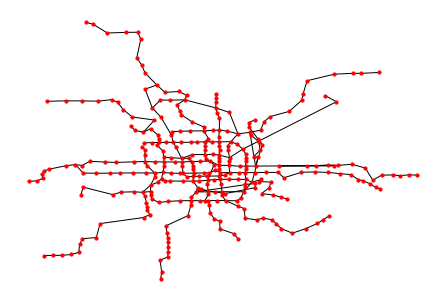

In [87]:
nx.draw(nx.Graph(simple_connection_info), location, with_labels=False, node_size=10,font_size=7)

In [88]:
import math

In [232]:
def search(start, destination, connection_graph, sort_candidate):
    pathes = [[start]]
    visited = set()
    
    while pathes:
        path = pathes.pop(0)
        froninter = path[-1]  #取最后一个
        if froninter in visited: continue
        
        successors = connection_graph[froninter]  #取出相邻结点
        
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination: return new_path
        visited.add(froninter)
        pathes = sort_candidate(pathes) # 我们可以加一个排序函数 对我们的搜索策略进行控制

In [233]:
def geo_distance(origin, destination):  #计算两个城市之间的距离，参数是经度和纬度，因为是地球上的环
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371  # km

    dlat = math.radians(lat2 - lat1)
    dlon = math.radians(lon2 - lon1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlon / 2) * math.sin(dlon / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [234]:
def get_geo_distance(city1, city2):
    return geo_distance(location[city1],location[city2])

In [235]:
def transfer_stations_first(pathes):  #换乘站数最少
    return sorted(pathes, key=len)

In [236]:
def transfer_as_much_possible(pathes): # 换乘站数最多
    return sorted(pathes, key=len, reverse=True)

In [237]:
def shortest_path_first(pathes): # 换乘站的总距离最少
    
    if len(pathes) <= 1: return pathes
    
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
#             distance += get_geo_distance(station, path[-1])
             for i in range(1, len(path)):
                distance += get_geo_distance(path[i - 1], path[i])
        return distance

    return sorted(pathes, key=get_path_distnace)

In [238]:
sorted({'a':3, 'b':2, 'c':4}.items(),key=lambda kv: kv[1])

[('b', 2), ('a', 3), ('c', 4)]

In [239]:
list(range(0,100,20))

[0, 20, 40, 60, 80]

In [257]:
def comprehensive_priority(pathes,weight=0.5): #综合优先就是把路程优先和最少换乘之间加一个权重，然后返回就行
    path_dict={}
    n = len(pathes)
    pathes_tran=sorted(pathes, key=len)
   
    for path,w in zip(pathes_tran, range(100,0,-n*10)):
        path_dict['-'.join(path)]=w
    def get_path_distnace(path):
        distance = 0
        for station in path[:-1]:
#             distance += get_geo_distance(station, path[-1])
             for i in range(1, len(path)):
                distance += get_geo_distance(path[i - 1], path[i])
        return distance
    pathes_short = sorted(pathes, key=get_path_distnace)
    for path ,w in zip(pathes_short, range(100,0,-n*10)):
        if '-'.join(path) in path_dict.keys():
            path_dict['-'.join(path)] += w
        else:
            path_dict['-'.join(path)] = w
    pathes_str=[i[0] for i in sorted(path_dict.items(), key=lambda kv: kv[1])]
    pathes_list=[item.split('-') for item in pathes_str]
    return pathes_list

In [258]:
def pretty_print(cities):
    print('🚗->'.join(cities))

In [259]:
pretty_print(search('西直门', '北京南站', simple_connection_info, sort_candidate=shortest_path_first))

西直门🚗->新街口🚗->平安里🚗->西四🚗->灵境胡同🚗->西单🚗->宣武门🚗->菜市口🚗->陶然亭🚗->北京南站


In [260]:
pretty_print(search('西直门', '北京南站', simple_connection_info, sort_candidate=transfer_as_much_possible))

西直门🚗->大钟寺🚗->知春路🚗->知春里🚗->海淀黄庄🚗->人民大学🚗->魏公村🚗->国家图书馆🚗->白石桥南🚗->花园桥🚗->慈寿寺🚗->西钓鱼台🚗->公主坟🚗->莲花桥🚗->六里桥🚗->六里桥东🚗->北京西站🚗->湾子🚗->达官营🚗->广安门内🚗->菜市口🚗->宣武门🚗->和平门🚗->前门🚗->崇文门🚗->北京站🚗->建国门🚗->东单🚗->王府井🚗->天安门东🚗->天安门西🚗->西单🚗->复兴门🚗->阜成门🚗->车公庄🚗->平安里🚗->北海北🚗->南锣鼓巷🚗->东四🚗->张自忠路🚗->北新桥🚗->雍和宫🚗->安定门🚗->鼓楼大街🚗->安德里北街🚗->安华桥🚗->北土城🚗->安贞门🚗->惠新西街南口🚗->芍药居🚗->太阳宫🚗->三元桥🚗->亮马桥🚗->农业展览馆🚗->团结湖🚗->呼家楼🚗->金台夕照🚗->国贸🚗->双井🚗->劲松🚗->潘家园🚗->十里河🚗->分钟寺🚗->成寿寺🚗->宋家庄🚗->石榴庄🚗->大红门🚗->角门东🚗->角门西🚗->马家堡🚗->北京南站


In [261]:
pretty_print(search('西直门', '北京南站', simple_connection_info, sort_candidate=transfer_stations_first))

西直门🚗->新街口🚗->平安里🚗->西四🚗->灵境胡同🚗->西单🚗->宣武门🚗->菜市口🚗->陶然亭🚗->北京南站


In [265]:
pretty_print(search('西直门', '大钟寺', simple_connection_info, sort_candidate=comprehensive_priority))

西直门🚗->大钟寺


In [205]:
pathes2=[['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门'],['西直门', '积水潭', '安定门', '雍和宫', '东直门'],['西直门', '安定门', '雍和宫', '东直门']]

In [247]:
comprehensive_priority(pathes2,weight=0.5)

[['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门'],
 ['西直门', '积水潭', '安定门', '雍和宫', '东直门'],
 ['西直门', '安定门', '雍和宫', '东直门']]

In [223]:
transfer_as_much_possible(pathes2)

[['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门'],
 ['西直门', '积水潭', '安定门', '雍和宫', '东直门'],
 ['西直门', '安定门', '雍和宫', '东直门']]

In [224]:
shortest_path_first(pathes2)

[['西直门', '安定门', '雍和宫', '东直门'],
 ['西直门', '积水潭', '安定门', '雍和宫', '东直门'],
 ['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门']]

In [219]:
path_dict = {'西直门-安定门-雍和宫-东直门': 200, '西直门-积水潭-安定门-雍和宫-东直门': 140, '西直门-积水潭-鼓楼大街-安定门-雍和宫-东直门': 80}
pathes_str=[i[0] for i in sorted(path_dict.items(), key=lambda kv: kv[1])]
print(pathes_str)
pathes_list=[item.split('-') for item in pathes_str]
pathes_list

['西直门-积水潭-鼓楼大街-安定门-雍和宫-东直门', '西直门-积水潭-安定门-雍和宫-东直门', '西直门-安定门-雍和宫-东直门']


[['西直门', '积水潭', '鼓楼大街', '安定门', '雍和宫', '东直门'],
 ['西直门', '积水潭', '安定门', '雍和宫', '东直门'],
 ['西直门', '安定门', '雍和宫', '东直门']]

# NLP第二次作业，波士顿房价预测
1. Re-code the house price machine learning
1. Random Choose Method to get optimal k and b
2. Supervised Direction to get optimal k and b
3. Gradient Descent to get optimal k and b
4. Try different Loss function and learning rate.
For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

In [4]:
from sklearn.datasets import load_boston  # 波士顿房价的数据集

In [5]:
data = load_boston()

In [6]:
X, y = data['data'], data['target']   # X是输入值，比如犯罪率，房子面积等等，y为输出，为房子的价格

In [7]:
X[10]

array([2.2489e-01, 1.2500e+01, 7.8700e+00, 0.0000e+00, 5.2400e-01,
       6.3770e+00, 9.4300e+01, 6.3467e+00, 5.0000e+00, 3.1100e+02,
       1.5200e+01, 3.9252e+02, 2.0450e+01])

In [8]:
y[10]

15.0

In [9]:
data['DESCR']  # 输入值的描述，比如犯罪率，税率，等等

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [10]:
len(X)  # 一共有506行数据，每行数据有13个属性，也就是有13列

506

In [11]:
len(X[0])

13

In [12]:
%matplotlib inline

In [13]:
import matplotlib.pyplot as plt
import random

In [14]:
def draw_rm_and_price():  # X只取出5列的数据，y是实际的房价
    plt.scatter(X[:, 5], y)

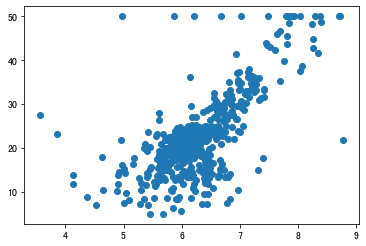

In [15]:
draw_rm_and_price()

In [16]:
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b

C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


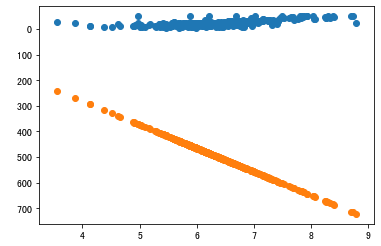

In [17]:
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]  # 预测价格

draw_rm_and_price() # 实际的价格
plt.scatter(X_rm, price_by_random_k_and_b)

In [18]:
def loss(y, y_hat): # to evaluate the performance 
    return sum((y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

# First-Method: Random generation: get best k and best b

In [19]:
trying_times = 2000

min_loss = float('inf')
best_k, best_b = None, None

for i in range(trying_times):
    k = random.random() * 200 - 100
    b = random.random() * 200 - 100
    price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

    current_loss = loss(y, price_by_random_k_and_b)
    
    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = k, b
        print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))

When time is : 0, get best_k: 6.46910871637121 best_b: 41.98788358889399, and the loss is: 3660.35583267166
When time is : 23, get best_k: -2.09219552030315 best_b: 40.411601493365765, and the loss is: 127.71535052612008
When time is : 154, get best_k: 8.963298052709362 best_b: -39.86941548682892, and the loss is: 80.46915825433422
When time is : 354, get best_k: 9.618150241143525 best_b: -43.75808723922163, and the loss is: 77.88801692853889
When time is : 909, get best_k: 11.360319551373237 best_b: -44.41811920260301, and the loss is: 65.86689979042896
When time is : 918, get best_k: 9.686230745162476 best_b: -34.634593643245154, and the loss is: 57.510647319365226
When time is : 1093, get best_k: 12.894471378954165 best_b: -56.19224878095015, and the loss is: 56.031766548507875
When time is : 1997, get best_k: 8.93644883806519 best_b: -34.51169147140614, and the loss is: 44.392321779362


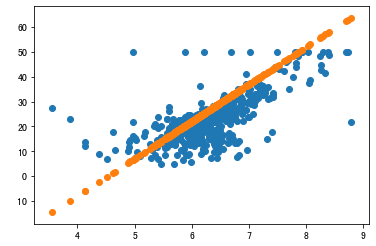

In [20]:
X_rm = X[:, 5]
k = 15  # 通过随机过程选择的最优解
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

# 2nd-Method: Direction Adjusting

In [21]:
trying_times = 2000

min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [
    (+1, -1),  # first element: k's change direction, second element: b's change direction
    (+1, +1), 
    (-1, -1), 
    (-1, +1),
]

next_direction = random.choice(direction)

scalar = 0.1  # 可以调参

update_time = 0

for i in range(trying_times):
    
    k_direction, b_direction = next_direction
    
    current_k, current_b = best_k + k_direction * scalar, best_b + b_direction * scalar
    
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]

    current_loss = loss(y, price_by_k_and_b)
    
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        
        next_direction = next_direction
        update_time += 1
        
        if update_time % 10 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)

When time is : 9, get best_k: 4.949273560544622 best_b: -28.65348211125321, and the loss is: 455.3808489929821
When time is : 19, get best_k: 5.9492735605446185 best_b: -27.653482111253197, and the loss is: 212.26848097265986
When time is : 29, get best_k: 6.949273560544615 best_b: -26.653482111253183, and the loss is: 76.27329969937311


# 3nd-Method: Gradient Descent to get optimal k and b
如果我们想得到更快的更新，在更短的时间内获得更好的结果，我们需要一件事情：
找对改变的方向？

如何找对改变的方向呢？

3nd-method: 监督让他变化--> 监督学习

$$ loss = \frac{1}{n} \sum{(y_i - (kx_i + b_i))}^2 $$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - (kx_i + b_i))x_i$$
$$ \frac{\partial{loss}}{\partial{k}} = -\frac{2}{n}\sum(y_i - \hat{y_i})x_i$$
$$ \frac{\partial{loss}}{\partial{b}} = -\frac{2}{n}\sum(y_i - \hat{y_i})$$

In [22]:
def partial_k(x, y, y_hat):  # 如上图所示，loss对k求导数
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat): # 如上图所示，loss对b求导数
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [27]:
trying_times = 2000  

X, y = data['data'], data['target']

min_loss = float('inf') 

current_k = random.random() * 200 - 100   # 初始化是一个研究的点，损失函数如何定义也是一个研究的点
current_b = random.random() * 200 - 100

learning_rate = 1e-04  #学习率是需要调参的

update_time = 0
for i in range(trying_times):
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]   # 由当前的k和b得到的预测值
    current_loss = loss(y, price_by_k_and_b)     # 当前预测值与实际值的误差
    if current_loss < min_loss: # performance became better
        min_loss = current_loss
        if i % 50 == 0: 
            print('When time is : {}, get best_k: {} best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    
    # 梯度下降
    k_gradient = partial_k(X_rm, y, price_by_k_and_b) # 对k求导的值
    b_gradient = partial_b(X_rm, y, price_by_k_and_b) # 对b求导的值
    # 更新下一轮的k,b值了
    current_k = current_k + (-1 * k_gradient) * learning_rate  
    current_b = current_b + (-1 * b_gradient) * learning_rate

When time is : 0, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 208825.9964340913
When time is : 50, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 91764.40801915227
When time is : 100, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 40357.24116402681
When time is : 150, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 17781.96784874335
When time is : 200, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 7868.112689577617
When time is : 250, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 3514.471934472718
When time is : 300, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 1602.5785296408899
When time is : 350, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 762.969338251951
When time is : 400, get best_k: 7.749273560544612 best_b: -25.85348211125317, and the loss is: 394.